# Toyota Corolla 중고차값 예측 모형 만들기

### 분석 절차

#### -1 데이터 구조파악 str(), summary() 및 Y값 (Price) 탐색

#### -2 전처리
    * 결측치 처리 - 결측치 없음 (apply(,,is.na))
    * 이상치 처리 - Price와 CC에서 이상치 발견 (boxplot, qplot() 사용)
    * Data Set 나누기 - train, validation, test 으로 구분
    * 필터링 - 양적 변수(이산형(descrete), 연속형(continous))와 질적 변수(category)로 구분.

#### -3 데이터 탐색
    * 변수별 상관계수
    * 탐색적 시각화

#### -4 변수 결정
    * step()
    * randomForest()
    
#### -5. 분석 모형 및 평가
    * Lenear Regression
    * Lasso
    * Random Forest
    * Boost


In [1]:
library(corrplot)
library(ggplot2)
library(reshape2)
library(Hmisc)
library(stats)
library(nnet)
library(devtools)
library(clusterGeneration)
library(scales)
library(reshape)
library(neuralnet)
library(dplyr)
library(ggplot2)
library(MASS)
library(glmnet)
library(randomForest)
library(gbm)
library(rpart)
library(boot)
library(data.table)
library(ROCR)
library(gridExtra)

corrplot 0.84 loaded
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units

Loading required package: MASS

Attaching package: ‘reshape’

The following objects are masked from ‘package:reshape2’:

    colsplit, melt, recast


Attaching package: ‘dplyr’

The following object is masked from ‘package:neuralnet’:

    compute

The following object is masked from ‘package:reshape’:

    rename

The following object is masked from ‘package:MASS’:

    select

The following objects are masked from ‘package:Hmisc’:

    combine, src, summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: Matrix

Attaching package: ‘Matrix’

The following object is masked from ‘pack

## 1. 데이터 구조파악 및 set 나누기

##### -1 데이터 불러오기

In [2]:
setwd("/Users/JYs/Documents/workspace/Encore/data/corolla")

In [3]:
data <- read.csv("data.csv",colClasses = c("Fuel_Type" = "character", "Color" = "character"))
head(data)
str(data)

Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,⋯,1,1,0,0,0,1,0,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,⋯,0,1,0,0,0,1,0,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,⋯,1,1,0,1,0,1,0,0,0,0
11,TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors,20950,25,8,2002,31461,Petrol,192,0,⋯,1,1,0,0,0,0,1,0,0,0
13,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,19600,25,8,2002,32189,Petrol,192,0,⋯,1,1,0,1,1,1,1,0,0,0
14,TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-Doors,21500,31,2,2002,23000,Petrol,192,1,⋯,1,1,0,1,1,1,1,0,0,0


'data.frame':	1436 obs. of  39 variables:
 $ Id               : int  1 2 5 11 13 14 16 17 18 20 ...
 $ Model            : Factor w/ 372 levels "_\x80TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors",..: 332 332 331 300 297 297 297 56 53 179 ...
 $ Price            : int  13500 13750 13750 20950 19600 21500 22000 22750 17950 16950 ...
 $ Age_08_04        : int  23 23 30 25 25 31 28 30 24 30 ...
 $ Mfg_Month        : int  10 10 3 8 8 2 5 3 9 3 ...
 $ Mfg_Year         : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ KM               : int  46986 72937 38500 31461 32189 23000 18739 34000 21716 64359 ...
 $ Fuel_Type        : chr  "Diesel" "Diesel" "Diesel" "Petrol" ...
 $ HP               : int  90 90 90 192 192 192 192 192 110 110 ...
 $ Met_Color        : int  1 1 0 0 0 1 0 1 1 1 ...
 $ Color            : chr  "Blue" "Silver" "Black" "Silver" ...
 $ Automatic        : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CC               : int  2000 2000 2000 1800 1800 1800 1800 1800 1600 1600 ...
 $

In [4]:
# id, Model 분석에서 제외
data <- data[,-c(1,2)]

In [5]:
head(data)

Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
13500,23,10,2002,46986,Diesel,90,1,Blue,0,⋯,1,1,0,0,0,1,0,0,0,0
13750,23,10,2002,72937,Diesel,90,1,Silver,0,⋯,0,1,0,0,0,1,0,0,0,0
13750,30,3,2002,38500,Diesel,90,0,Black,0,⋯,1,1,0,1,0,1,0,0,0,0
20950,25,8,2002,31461,Petrol,192,0,Silver,0,⋯,1,1,0,0,0,0,1,0,0,0
19600,25,8,2002,32189,Petrol,192,0,Red,0,⋯,1,1,0,1,1,1,1,0,0,0
21500,31,2,2002,23000,Petrol,192,1,Black,0,⋯,1,1,0,1,1,1,1,0,0,0


##### 질적 변수 factor화

In [6]:
data$Fuel_Type = factor(data$Fuel_Type) 
data$Met_Color = factor(data$Met_Color) 
data$Color = factor(data$Color) 
data$Automatic = factor(data$Automatic) 
data$Mfr_Guarantee = factor(data$Mfr_Guarantee)  
data$BOVAG_Guarantee = factor(data$BOVAG_Guarantee)     
data$ABS = factor(data$ABS)
data$Airbag_1 = factor(data$Airbag_1) 
data$Airbag_2 = factor(data$Airbag_2)
data$Airco = factor(data$Airco)
data$Automatic_airco = factor(data$Automatic_airco)  
data$Boardcomputer = factor(data$Boardcomputer)  
data$CD_Player = factor(data$CD_Player)
data$Central_Lock = factor(data$Central_Lock)
data$Powered_Windows = factor(data$Powered_Windows)
data$Power_Steering = factor(data$Power_Steering)
data$Radio = factor(data$Radio)
data$Mistlamps = factor(data$Mistlamps)
data$Sport_Model = factor(data$Sport_Model)
data$Backseat_Divider = factor(data$Backseat_Divider)
data$Metallic_Rim = factor(data$Metallic_Rim)
data$Radio_cassette = factor(data$Radio_cassette)
data$Parking_Assistant = factor(data$Parking_Assistant)
data$Tow_Bar = factor(data$Tow_Bar)

#### -2. 데이터 구조파악

In [7]:
str(data) #변수 체크

summary(data)

'data.frame':	1436 obs. of  37 variables:
 $ Price            : int  13500 13750 13750 20950 19600 21500 22000 22750 17950 16950 ...
 $ Age_08_04        : int  23 23 30 25 25 31 28 30 24 30 ...
 $ Mfg_Month        : int  10 10 3 8 8 2 5 3 9 3 ...
 $ Mfg_Year         : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ KM               : int  46986 72937 38500 31461 32189 23000 18739 34000 21716 64359 ...
 $ Fuel_Type        : Factor w/ 3 levels "CNG","Diesel",..: 2 2 2 3 3 3 3 3 3 3 ...
 $ HP               : int  90 90 90 192 192 192 192 192 110 110 ...
 $ Met_Color        : Factor w/ 2 levels "0","1": 2 2 1 1 1 2 1 2 2 2 ...
 $ Color            : Factor w/ 10 levels "Beige","Black",..: 3 7 2 7 6 2 5 5 3 5 ...
 $ Automatic        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ CC               : int  2000 2000 2000 1800 1800 1800 1800 1800 1600 1600 ...
 $ Doors            : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Cylinders        : int  4 4 4 4 4 4 4 4 4 4 ...
 $ Gears    

     Price         Age_08_04       Mfg_Month         Mfg_Year   
 Min.   : 4350   Min.   : 1.00   Min.   : 1.000   Min.   :1998  
 1st Qu.: 8450   1st Qu.:44.00   1st Qu.: 3.000   1st Qu.:1998  
 Median : 9900   Median :61.00   Median : 5.000   Median :1999  
 Mean   :10731   Mean   :55.95   Mean   : 5.549   Mean   :2000  
 3rd Qu.:11950   3rd Qu.:70.00   3rd Qu.: 8.000   3rd Qu.:2001  
 Max.   :32500   Max.   :80.00   Max.   :12.000   Max.   :2004  
                                                                
       KM          Fuel_Type          HP        Met_Color     Color    
 Min.   :     1   CNG   :  17   Min.   : 69.0   0:467     Grey   :301  
 1st Qu.: 43000   Diesel: 155   1st Qu.: 90.0   1:969     Blue   :283  
 Median : 63390   Petrol:1264   Median :110.0             Red    :278  
 Mean   : 68533                 Mean   :101.5             Green  :220  
 3rd Qu.: 87021                 3rd Qu.:110.0             Black  :191  
 Max.   :243000                 Max.   :192.0   

#### -3 Y값 탐색

In [8]:
summary(data$Price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4350    8450    9900   10731   11950   32500 

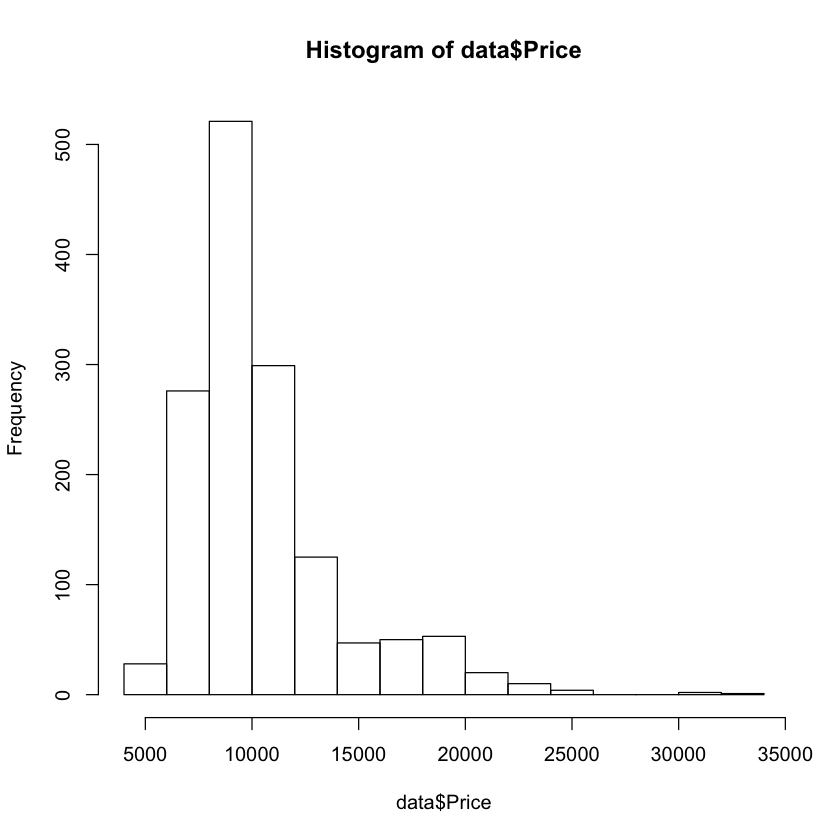

In [9]:
hist(data$Price)

## 2. 전처리
- 결측값
- 이상치
- DataSet 구분
- 필터링 - 분석목적고려 subset

### -1. 결측값
다행스럽게도 결측값 없음

In [10]:
apply(apply(data,2,is.na),2,sum)

Price         Age_08_04         Mfg_Month          Mfg_Year 
                0                 0                 0                 0 
               KM         Fuel_Type                HP         Met_Color 
                0                 0                 0                 0 
            Color         Automatic                CC             Doors 
                0                 0                 0                 0 
        Cylinders             Gears     Quarterly_Tax            Weight 
                0                 0                 0                 0 
    Mfr_Guarantee   BOVAG_Guarantee  Guarantee_Period               ABS 
                0                 0                 0                 0 
         Airbag_1          Airbag_2             Airco   Automatic_airco 
                0                 0                 0                 0 
    Boardcomputer         CD_Player      Central_Lock   Powered_Windows 
                0                 0                 0                 0 
   Power_Steering             Radio         Mistlamps       Sport_Model 
                0                 0                 0                 0 
 Backseat_Divider      Metallic_Rim    Radio_cassette Parking_Assistant 
                0                 0                 0                 0 
          Tow_Bar 
                0

In [11]:
# 만약 결측값이 있다면, 중앙값으로 치환

for (i in 1:100)  #열의 길이 구하는 함수
data[,1:i]

ERROR: Error in `[.data.frame`(data, , 1:i): undefined columns selected


### -2. 이상치
- 박스 플롯에 벗어나느 값들을 도표를 이용해 확인해보고, 이상치를 삭제한다. 
- 'Price' 열과 'CC' 열에서 이상치가 발견되어 제거함

###### (1) Price 

In [12]:
# Step.1 박스플롯 이용하여 이상치 찾기
b <- which(data$Price %in% boxplot.stats(data$Price)$out)
b

[1]    4    5    6    7    8    9   16   18   30   32   34   35   40   43   44
 [16]   45   47   50   52   53   55   56   58   60   63   64   66   69   70   71
 [31]   73   74   76   77   78   79   80   81   82   83   84   85   86   89   92
 [46]  100  102  104  105  106  107  108  109  110  112  113  114  115  116  117
 [61]  118  119  120  121  122  123  124  125  126  127  128  129  130  131  132
 [76]  133  134  367 1024 1025 1027 1028 1036 1037 1038 1041 1044 1046 1048 1049
 [91] 1050 1051 1052 1053 1054 1055 1056 1057 1058 1060 1062 1063 1064 1065 1066
[106] 1067 1068 1069 1070 1071

In [13]:
data$Price[c(b)]

[1] 20950 19600 21500 22000 22750 17950 17495 17950 17950 17950 20500 21950
 [13] 18950 18750 17950 17950 18950 18950 18750 18450 18950 17950 17450 17950
 [25] 22250 19950 18900 18750 17450 18990 18500 19450 18800 17950 31000 24950
 [37] 24950 22950 24990 21950 17900 19250 19950 21750 17950 18450 23000 23950
 [49] 19950 18950 20500 24500 19450 20950 19950 18450 21750 19500 19750 19750
 [61] 20750 19600 19500 17650 19950 19950 20950 20500 17795 23750 19500 21950
 [73] 19950 19950 21950 21500 17795 18950 18600 21500 19950 22500 19000 21950
 [85] 17950 22250 19950 17250 21950 19950 18500 17450 32500 31275 22250 18950
 [97] 18950 19900 18500 19500 18900 18950 18245 18950 18950 22500 18500 18700
[109] 21125 18245

In [14]:
ot <- cbind(b,data$Price[c(b)])

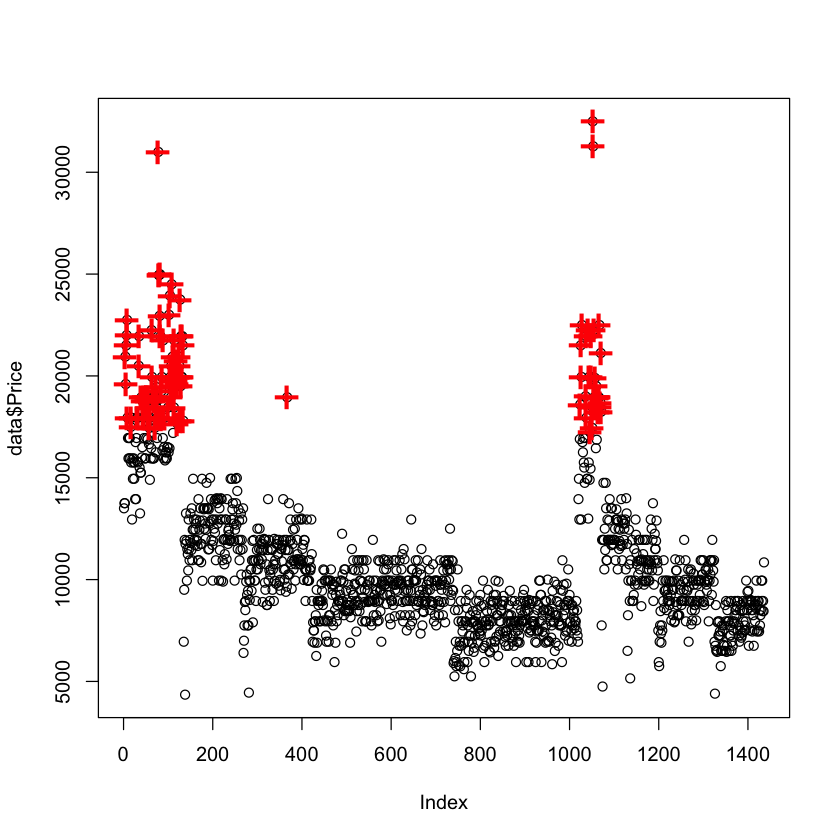

In [15]:
# Step.2-1 도표 이용하여 이상치 보기
plot(data$Price)
points(ot, col="red", pch="+", cex=2.5) # 이상치 추정 - price가 30000불 이상인 값

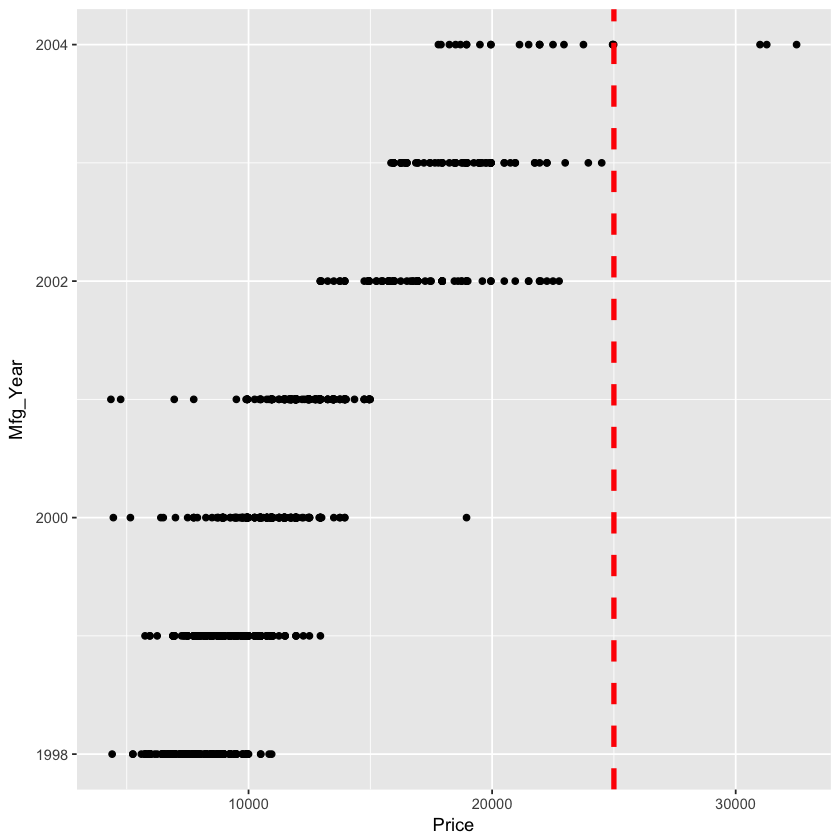

In [16]:
# Step.2-1 산점도 이용하여 이상치 보기
qplot(Price, Mfg_Year, data = data) + geom_vline(xintercept = 25000, linetype = "dashed", color = "red", size=1.5)

In [17]:
# Step.3 이상치 case no.확인

data[data$Price > 30000,] #이상치 찾기 - 78st case 이상치 확인

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
78,31000,4,5,2004,4000,Diesel,116,1,Grey,0,⋯,1,1,0,1,1,1,1,0,0,0
1052,32500,4,5,2004,1,Diesel,116,0,Grey,0,⋯,1,1,0,1,1,1,0,0,0,0
1053,31275,4,5,2004,1500,Diesel,116,1,Grey,0,⋯,1,1,0,1,1,1,0,0,0,0


In [18]:
# Step.4 이상치 삭제
data <- data[-78,] #78st case 삭제
data[data$Price > 30000,] #삭제 확인
rownames(data) <- NULL #행이름 초기화
#data <- data[-1052,] #1052st case 삭제
#data <- data[-1053,] #1053st case 삭제

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1052,32500,4,5,2004,1,Diesel,116,0,Grey,0,⋯,1,1,0,1,1,1,0,0,0,0
1053,31275,4,5,2004,1500,Diesel,116,1,Grey,0,⋯,1,1,0,1,1,1,0,0,0,0


In [19]:
data <- data[-1052,] #1052st case 삭제
data[data$Price > 30000,] #삭제 확인
rownames(data) <- NULL #행이름 초기화

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1051,32500,4,5,2004,1,Diesel,116,0,Grey,0,⋯,1,1,0,1,1,1,0,0,0,0


In [20]:
data <- data[-1051,] #1052st case 삭제
data[data$Price > 30000,] #삭제 확인
rownames(data) <- NULL # 행이름 초기화

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar


###### (2) CC

In [21]:
# Step.1 박스플롯 이용하여 이상치 찾기
CC_b <- which(data$CC %in% boxplot.stats(data$CC)$out)
CC_b

[1]    1    2    3   29   30   32   55   60   63   64   78   79   80   81   82
 [16]   84   85  101  135  136  152  185  270  273  279  294  296  322  336  423
 [31]  424  425  426  427  429  431  432  433  438  439  440  441  442  443  445
 [46]  446  447  452  454  459  465  479  489  497  573  609  739  740  742  743
 [61]  744  745  748  749  753  755  758  759  760  761  765  767  768  769  770
 [76]  777  789  790  796  847  853  947 1019 1020 1021 1022 1023 1034 1035 1037
 [91] 1040 1047 1048 1051 1073 1078 1090 1130 1133 1196 1198 1200 1202 1203 1205
[106] 1206 1219 1228 1244 1251 1322 1323 1324 1325 1326 1329 1330 1332 1369 1396

In [22]:
data$CC[c(CC_b)]

[1]  2000  2000  2000  2000  2000  2000 16000  2000  2000  1995  2000  2000
 [13]  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000
 [25]  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000
 [37]  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000
 [49]  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000
 [61]  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000
 [73]  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000
 [85]  2000  2000  2000  2000  2000  2000  2000  2000  1995  2000  2000  2000
 [97]  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000
[109]  1975  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000  2000

In [23]:
CC_ot <- cbind(CC_b,data$CC[c(CC_b)])

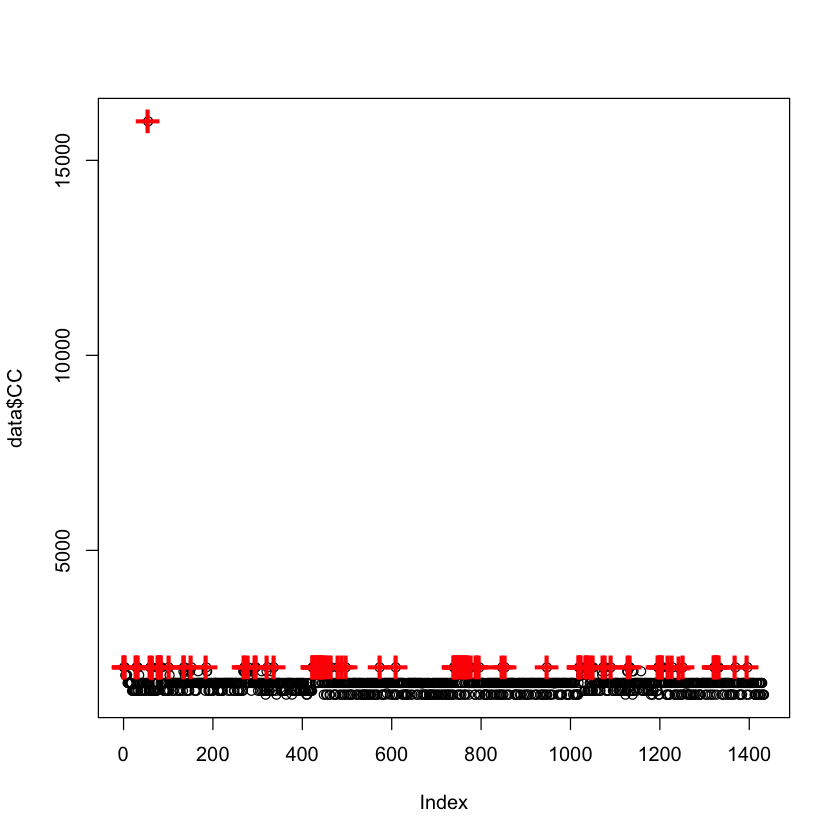

In [24]:
# Step.2-1 도표 이용하여 이상치 보기
plot(data$CC)
points(CC_ot, col="red", pch="+", cex=2.5) # 이상치 추정 

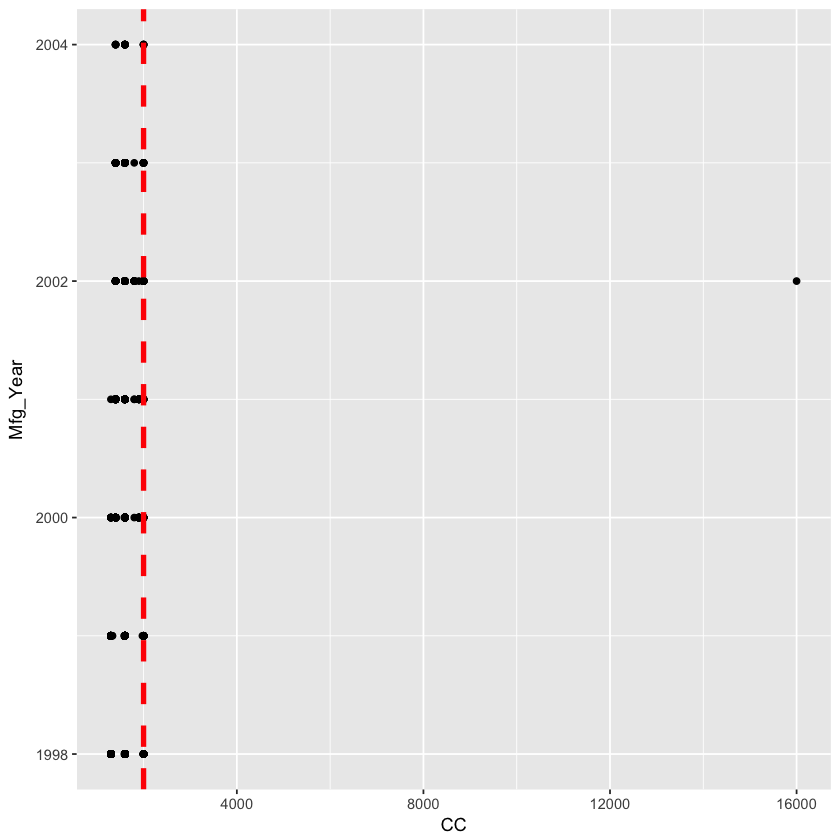

In [25]:
# Step.2-2 삼점도 이용하여 이상치 보기
qplot(CC, Mfg_Year, data = data) + geom_vline(xintercept = 2000, linetype = "dashed", color = "red", size=1.5)

In [26]:
# Step.3 이상치 찾기
data[data$CC > 10000,] #이상치 찾기 - 55st case 이상치 확인

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
55,18950,25,8,2002,20019,Petrol,110,1,Blue,1,⋯,1,1,0,0,0,0,0,0,0,0


In [27]:
data <- data[-55,] #55st case 삭제

In [28]:
data[data$CC> 10000,] #삭제 확인
rownames(data) <- NULL

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,⋯,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar


### -3. 훈련, 검증, 세트 구분
- train dataset - 데이터로 학습해서 분석 모형을 생성
- test dataset - 분석 모형 검증 
- validation dataset - 검증용, 파라미터를 튜닝하기 위해 만듬

In [29]:
set.seed(1606)
n <- nrow(data)
idx <- 1:n
training_idx <- sample(idx, n*.60)
idx <- setdiff(idx, training_idx) # setdiff() - 차집합 구하는 함수, idx에만 있고 training_idx에 없는 것을 구하라.
validate_idx <- sample(idx,n*.20)
test_idx <- setdiff(idx, validate_idx) # idx에만 있고 validate_idx에 없는 것을 구하라.

train <- data[training_idx,]
validation <- data[validate_idx,]
test <- data[test_idx,]

In [30]:
nrow(train)      # cases - 861개
nrow(validation) # cases - 287개 
nrow(test)       # cases - 288개 

[1] 859

[1] 286

[1] 287

### -4. 필터링
- 양적 변수(이산형(descrete), 연속형(continous))와 질적 변수(category)로 구분.

##### Step1. 양적 변수(이산형(descrete), 연속형(continous))와 질적 변수(category)로 구분.

In [31]:
# 연속형 변수 (initial)
con_var = c('KM', 'Age_08_04', 'Weight')

# 이산형 변수 (initial) - Cylinder 제외
des_var = c('HP', 'CC', 'Doors', 'Gears', 'Quarterly_Tax', 'Mfg_Month', 'Mfg_Year', 'Guarantee_Period')

# 질적 변수 (initial)
cat_var = c('Fuel_Type', 'Met_Color', 'Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 
           'Automatic_airco', 'Boardcomputer','CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 
           'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Parking_Assistant', 'Tow_Bar')

#### Step2. 연속형, 이상형, 질적변수만의 DataFrame 생성.

In [32]:
dfy <- data.frame(train[,1])  # Price
dfx <- train[,2:length(train)] # 독립변수
names(dfy) <- "Price"

str(dfy)

'data.frame':	859 obs. of  1 variable:
 $ Price: int  10500 7950 18600 8500 11950 10000 8750 15500 12450 11950 ...


In [33]:
# 연속형 변수
dfx_con = dfx[,con_var]
str(dfx_con)

'data.frame':	859 obs. of  3 variables:
 $ KM       : int  25000 43000 75889 17016 37000 52000 75226 49163 26262 40361 ...
 $ Age_08_04: int  58 58 30 71 44 56 78 25 38 47 ...
 $ Weight   : int  1075 1114 1245 1015 1075 1025 1035 1165 1075 1090 ...


In [34]:
# 이산형 변수
dfx_des = dfx[,des_var]
str(dfx_des)

'data.frame':	859 obs. of  8 variables:
 $ HP              : int  110 110 90 86 110 97 110 110 110 110 ...
 $ CC              : int  1600 1600 2000 1300 1600 1400 1600 1600 1600 1600 ...
 $ Doors           : int  5 4 3 3 4 3 4 5 5 5 ...
 $ Gears           : int  5 3 5 5 5 5 5 5 5 5 ...
 $ Quarterly_Tax   : int  85 72 210 69 19 69 69 100 85 85 ...
 $ Mfg_Month       : int  11 11 3 10 1 1 3 8 7 10 ...
 $ Mfg_Year        : int  1999 1999 2002 1998 2001 2000 1998 2002 2001 2000 ...
 $ Guarantee_Period: int  6 3 3 3 3 3 6 3 3 3 ...


In [35]:
# 질적 변수
dfx_cat = dfx[,cat_var]
str(dfx_cat)

'data.frame':	859 obs. of  24 variables:
 $ Fuel_Type        : Factor w/ 3 levels "CNG","Diesel",..: 3 1 2 3 3 3 3 3 3 3 ...
 $ Met_Color        : Factor w/ 2 levels "0","1": 2 2 2 1 1 1 1 1 2 2 ...
 $ Color            : Factor w/ 10 levels "Beige","Black",..: 4 7 5 3 4 5 6 4 5 2 ...
 $ Automatic        : Factor w/ 2 levels "0","1": 1 2 1 1 1 1 1 2 1 1 ...
 $ Mfr_Guarantee    : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 1 1 ...
 $ BOVAG_Guarantee  : Factor w/ 2 levels "0","1": 1 1 2 2 2 1 2 2 2 2 ...
 $ ABS              : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 1 2 2 2 ...
 $ Airbag_1         : Factor w/ 2 levels "0","1": 2 2 2 2 2 2 1 2 2 2 ...
 $ Airbag_2         : Factor w/ 2 levels "0","1": 1 1 2 2 1 2 1 2 2 2 ...
 $ Airco            : Factor w/ 2 levels "0","1": 1 1 2 1 1 1 1 1 2 2 ...
 $ Automatic_airco  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Boardcomputer    : Factor w/ 2 levels "0","1": 1 1 2 1 1 2 1 2 2 1 ...
 $ CD_Player        : Factor w/ 2 levels "0","1":

## 3. 데이터 탐색

### -1. 변수별 상관계수 확인
- 양적 변수간 상관성을 확인 후, 상관성이 높은 계수들 중 하나를 탈락시킨다. 

#### step.1 데이터셋 설정

In [36]:
# 상관계수 확인을 위한 데이터셋 만들기 - 'Y - Price'와 'dfx_con 이산형 변수모음'dfx_des 연속형 변수모음'
dfx_con_des_cor <- cbind(dfy$Price,dfx_con,dfx_des)
names(dfx_con_des_cor)[names(dfx_con_des_cor) == "dfy$Price"] <- c("Price") #price 변수명 변경

str(dfx_con_des_cor)

'data.frame':	859 obs. of  12 variables:
 $ Price           : int  10500 7950 18600 8500 11950 10000 8750 15500 12450 11950 ...
 $ KM              : int  25000 43000 75889 17016 37000 52000 75226 49163 26262 40361 ...
 $ Age_08_04       : int  58 58 30 71 44 56 78 25 38 47 ...
 $ Weight          : int  1075 1114 1245 1015 1075 1025 1035 1165 1075 1090 ...
 $ HP              : int  110 110 90 86 110 97 110 110 110 110 ...
 $ CC              : int  1600 1600 2000 1300 1600 1400 1600 1600 1600 1600 ...
 $ Doors           : int  5 4 3 3 4 3 4 5 5 5 ...
 $ Gears           : int  5 3 5 5 5 5 5 5 5 5 ...
 $ Quarterly_Tax   : int  85 72 210 69 19 69 69 100 85 85 ...
 $ Mfg_Month       : int  11 11 3 10 1 1 3 8 7 10 ...
 $ Mfg_Year        : int  1999 1999 2002 1998 2001 2000 1998 2002 2001 2000 ...
 $ Guarantee_Period: int  6 3 3 3 3 3 6 3 3 3 ...


#### step.2 corrplot 
- Mfg_Year와 Age_08_04간 강한 음의 상관관계 발견

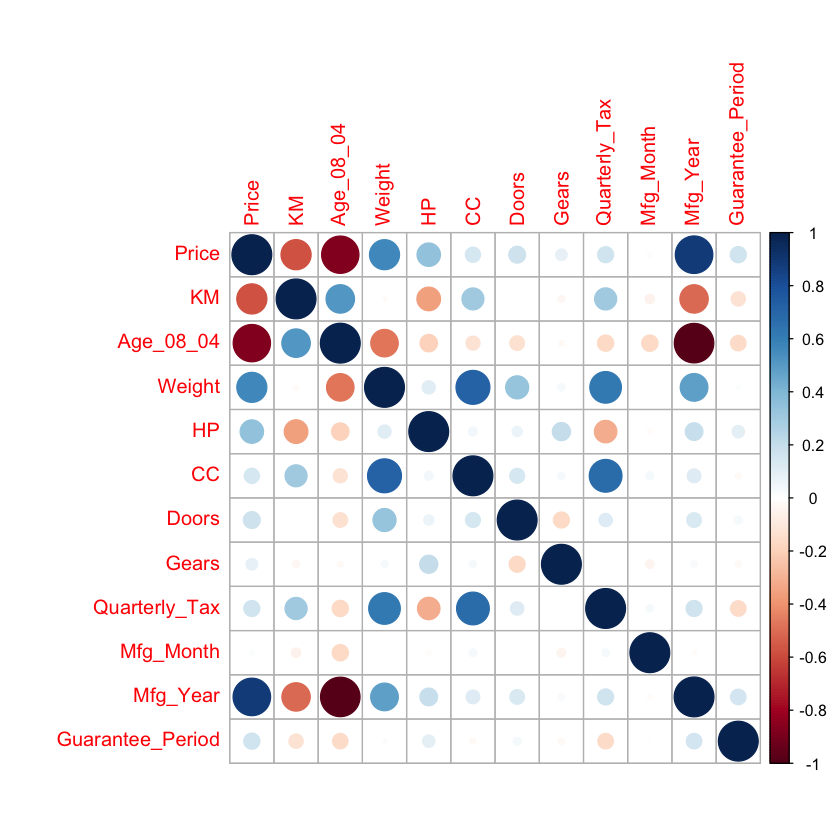

In [37]:
# corrplot 그려보기 
corrplot(cor(as.matrix(dfx_con_des_cor)))

#### step.3 상관계수, p-value 확인 
- 상관분석표처럼 Mfg_Year와 Age_08_04간 높은 음의 상관계수와, 유의수준 이하의 p-vlaue 값 발견
- Mfg_Year 삭제하고, Age_08_04 만 진행 결정

In [38]:
#상관계수, p-value 확인
col <- rcorr(as.matrix(dfx_con_des_cor),type="spearman")
col

                 Price    KM Age_08_04 Weight    HP    CC Doors Gears
Price             1.00 -0.61     -0.85   0.41  0.25  0.12  0.20  0.09
KM               -0.61  1.00      0.53  -0.07 -0.23  0.18 -0.01 -0.04
Age_08_04        -0.85  0.53      1.00  -0.38 -0.12 -0.12 -0.11 -0.03
Weight            0.41 -0.07     -0.38   1.00  0.16  0.69  0.46  0.01
HP                0.25 -0.23     -0.12   0.16  1.00  0.35  0.14  0.12
CC                0.12  0.18     -0.12   0.69  0.35  1.00  0.16  0.06
Doors             0.20 -0.01     -0.11   0.46  0.14  0.16  1.00 -0.17
Gears             0.09 -0.04     -0.03   0.01  0.12  0.06 -0.17  1.00
Quarterly_Tax     0.31  0.03     -0.26   0.70  0.06  0.52  0.37  0.09
Mfg_Month         0.09 -0.06     -0.24   0.04  0.00  0.04  0.00 -0.02
Mfg_Year          0.85 -0.53     -0.97   0.37  0.13  0.11  0.12  0.04
Guarantee_Period  0.05 -0.03     -0.01   0.00  0.05  0.00  0.04 -0.05
                 Quarterly_Tax Mfg_Month Mfg_Year Guarantee_Period
Price                  

### -2. 탐색적 시각화

- histogram
- QQplot
- side-by-side 차트

In [39]:
library(scatterplot3d)
library(RColorBrewer)
library(lattice)

In [40]:
# 그래프를 위한 데이터셋 만들기 - 'Y - Price'와 'dfx_con 이산형 변수모음'dfx_des 연속형 변수모음'
dfx_con_des_histo <- cbind(dfy$Price,dfx_con,dfx_des)
names(dfx_con_des_histo)[names(dfx_con_des_histo) == "dfy$Price"] <- c("Price") #price 변수명 변경

str(dfx_con_des_histo)

'data.frame':	859 obs. of  12 variables:
 $ Price           : int  10500 7950 18600 8500 11950 10000 8750 15500 12450 11950 ...
 $ KM              : int  25000 43000 75889 17016 37000 52000 75226 49163 26262 40361 ...
 $ Age_08_04       : int  58 58 30 71 44 56 78 25 38 47 ...
 $ Weight          : int  1075 1114 1245 1015 1075 1025 1035 1165 1075 1090 ...
 $ HP              : int  110 110 90 86 110 97 110 110 110 110 ...
 $ CC              : int  1600 1600 2000 1300 1600 1400 1600 1600 1600 1600 ...
 $ Doors           : int  5 4 3 3 4 3 4 5 5 5 ...
 $ Gears           : int  5 3 5 5 5 5 5 5 5 5 ...
 $ Quarterly_Tax   : int  85 72 210 69 19 69 69 100 85 85 ...
 $ Mfg_Month       : int  11 11 3 10 1 1 3 8 7 10 ...
 $ Mfg_Year        : int  1999 1999 2002 1998 2001 2000 1998 2002 2001 2000 ...
 $ Guarantee_Period: int  6 3 3 3 3 3 6 3 3 3 ...


In [41]:
# 그래프를 위한 factor화 작업 - 'Mfg_Year' 레벨이 있는 factor 만들기
dfx_con_des_histo$year <- factor(dfx_con_des_histo$Mfg_Year)
dfx_con_des_histo$Price_n <- as.numeric(dfx_con_des_histo$Price)
dfx_con_des_histo$Doors_n <- as.numeric(dfx_con_des_histo$Doors)

In [42]:
str(dfx_con_des_histo)

'data.frame':	859 obs. of  15 variables:
 $ Price           : int  10500 7950 18600 8500 11950 10000 8750 15500 12450 11950 ...
 $ KM              : int  25000 43000 75889 17016 37000 52000 75226 49163 26262 40361 ...
 $ Age_08_04       : int  58 58 30 71 44 56 78 25 38 47 ...
 $ Weight          : int  1075 1114 1245 1015 1075 1025 1035 1165 1075 1090 ...
 $ HP              : int  110 110 90 86 110 97 110 110 110 110 ...
 $ CC              : int  1600 1600 2000 1300 1600 1400 1600 1600 1600 1600 ...
 $ Doors           : int  5 4 3 3 4 3 4 5 5 5 ...
 $ Gears           : int  5 3 5 5 5 5 5 5 5 5 ...
 $ Quarterly_Tax   : int  85 72 210 69 19 69 69 100 85 85 ...
 $ Mfg_Month       : int  11 11 3 10 1 1 3 8 7 10 ...
 $ Mfg_Year        : int  1999 1999 2002 1998 2001 2000 1998 2002 2001 2000 ...
 $ Guarantee_Period: int  6 3 3 3 3 3 6 3 3 3 ...
 $ year            : Factor w/ 7 levels "1998","1999",..: 2 2 5 1 4 3 1 5 4 3 ...
 $ Price_n         : num  10500 7950 18600 8500 11950 ...
 $ Doors_

In [43]:
dfx_con_des_histo$freq <- ave(dfx_con_des_histo$Doors_n,dfx_con_des_histo$Mfg_Year, FUN = length)

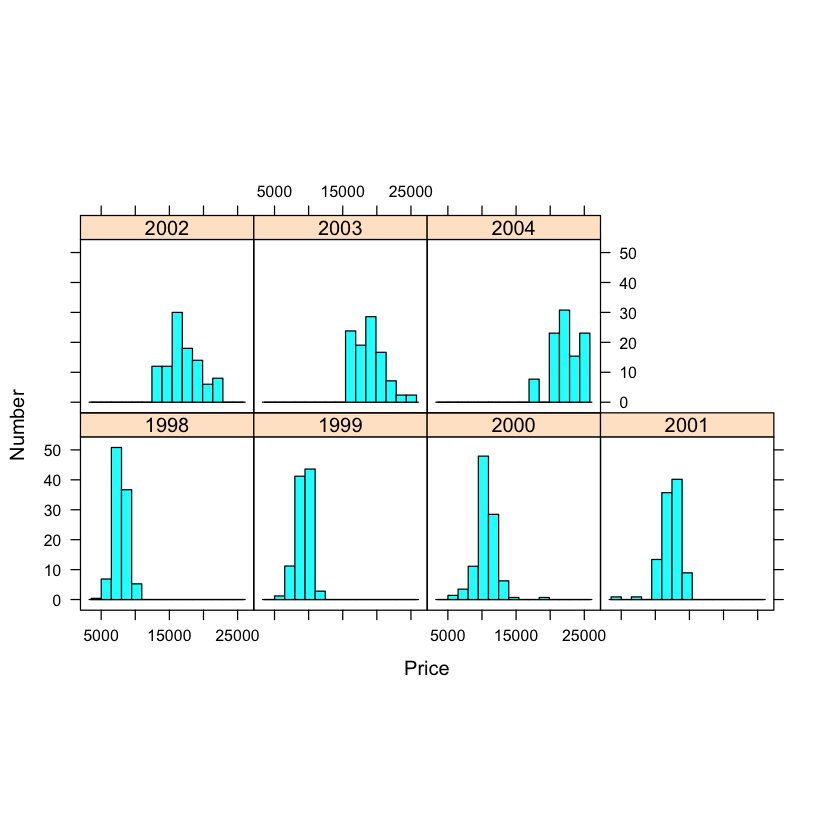

In [44]:

histogram(~ Price | year,  
         data= dfx_con_des_histo,
         aspect = 1,
         layout= c(4,2),
         nint= 15,
         xlab = "Price",
         ylab = "Number"
         )

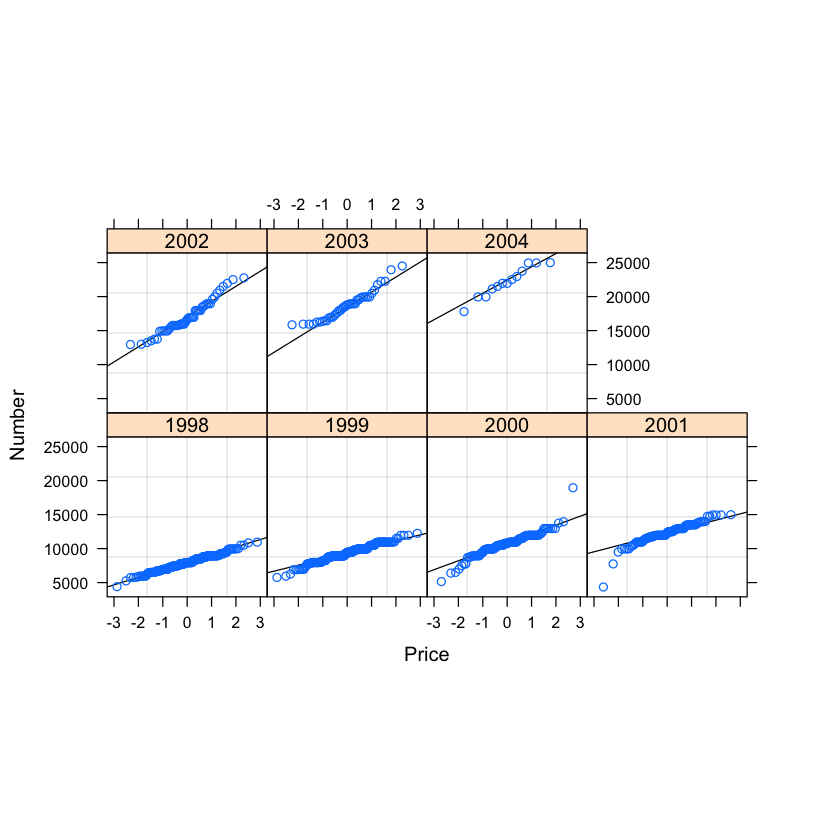

In [45]:
qqmath(~ Price | year,  
      data= dfx_con_des_histo,
      aspect = 1,
      layout=c(4,2),
      prepanel = prepanel.qqmathline,
      panel = function(x, ...){
          panel.grid()
          panel.qqmathline(x, ...)
          panel.qqmath(x, ...)
      },
      xlab = "Price",
         ylab = "Number")

## 4. 변수결정
- 단계적 변수 선택 
- Random Forest 이용

### -1. 단계적 변수 선택
- 선택 변수가 너무 많아서, 해석이 용이하지 않음

In [46]:
dfx_con_des_step <- cbind(dfx_con_des_cor, dfx_cat)

In [47]:
LM <- lm(Price~., data = dfx_con_des_step)

In [48]:
Slm <- step(LM, direction = "both")

Start:  AIC=11990.14
Price ~ KM + Age_08_04 + Weight + HP + CC + Doors + Gears + Quarterly_Tax + 
    Mfg_Month + Mfg_Year + Guarantee_Period + Fuel_Type + Met_Color + 
    Color + Automatic + Mfr_Guarantee + BOVAG_Guarantee + ABS + 
    Airbag_1 + Airbag_2 + Airco + Automatic_airco + Boardcomputer + 
    CD_Player + Central_Lock + Powered_Windows + Power_Steering + 
    Radio + Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + 
    Radio_cassette + Parking_Assistant + Tow_Bar


Step:  AIC=11990.14
Price ~ KM + Age_08_04 + Weight + HP + CC + Doors + Gears + Quarterly_Tax + 
    Mfg_Month + Guarantee_Period + Fuel_Type + Met_Color + Color + 
    Automatic + Mfr_Guarantee + BOVAG_Guarantee + ABS + Airbag_1 + 
    Airbag_2 + Airco + Automatic_airco + Boardcomputer + CD_Player + 
    Central_Lock + Powered_Windows + Power_Steering + Radio + 
    Mistlamps + Sport_Model + Backseat_Divider + Metallic_Rim + 
    Radio_cassette + Parking_Assistant + Tow_Bar

                    Df Su

In [49]:
Slm


Call:
lm(formula = Price ~ KM + Age_08_04 + Weight + HP + CC + Quarterly_Tax + 
    Mfg_Month + Guarantee_Period + Fuel_Type + Color + Mfr_Guarantee + 
    BOVAG_Guarantee + Airbag_2 + Airco + Automatic_airco + Boardcomputer + 
    CD_Player + Powered_Windows + Radio + Sport_Model + Backseat_Divider + 
    Radio_cassette + Tow_Bar, data = dfx_con_des_step)

Coefficients:
      (Intercept)                 KM          Age_08_04             Weight  
       -4.716e+03         -1.336e-02         -1.119e+02          1.794e+01  
               HP                 CC      Quarterly_Tax          Mfg_Month  
        2.681e+01         -2.630e+00          1.447e+01         -8.362e+01  
 Guarantee_Period    Fuel_TypeDiesel    Fuel_TypePetrol         ColorBlack  
        7.619e+01          2.051e+03          2.640e+03          7.409e+02  
        ColorBlue         ColorGreen          ColorGrey           ColorRed  
        5.402e+02          2.759e+02          6.109e+02          3.505e+02  
      Col

### -2. Random Forest
- 최종변수 선정 : Age_08_04, Mfg_Year,KM, Weight, Boardcomputer, Automatic_airco, CD_Player

In [50]:
library(randomForest)
library(rpart)

#### Step.1 분석모형 생성 

In [51]:
rf.toyota <- randomForest(Price~., data = dfx_con_des_step, ntree =100,
                          mtry=6, importance=T)
rf.toyota


Call:
 randomForest(formula = Price ~ ., data = dfx_con_des_step, ntree = 100,      mtry = 6, importance = T) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 6

          Mean of squared residuals: 1278529
                    % Var explained: 89.77

In [52]:
# mean square error - 데이터의 표준편차 
range(dfx_con_des_step$Price) # 범위는 4350 ~ 24990
dfx_con_des_step$Price.hat = predict(rf.toyota, newdata=dfx_con_des_step)
mean((dfx_con_des_step$Price - dfx_con_des_step$Price.hat)^2) 

[1]  4350 24990

[1] 320567.4

#### Step.3 그림으로 판단해보기

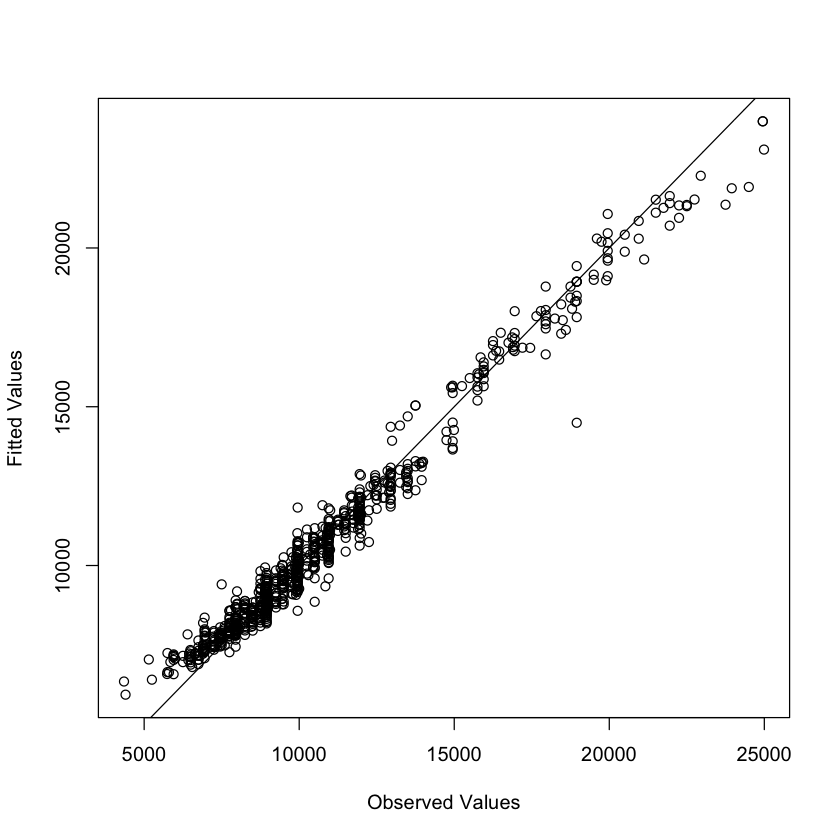

In [53]:
par(mfrow=c(1,1))
dfx_con_des_step$Price.hat = predict(rf.toyota, newdata=dfx_con_des_step)
plot(dfx_con_des_step$Price, dfx_con_des_step$Price.hat, 
     xlab= 'Observed Values', ylab='Fitted Values')
abline(0,1) 
# x축에 Price, y축에 예측값을 넣어 그래프를 그려보는 작업
# 점들이 선에 몰려있으니, 성능이 좋다고 판단.

,%IncMSE
KM,7.5455661
Age_08_04,12.9918615
Weight,7.9737509
HP,5.4330153
CC,6.2948486
Doors,5.3712899
Gears,1.6675930
Quarterly_Tax,4.2461914
Mfg_Month,3.2117194
Mfg_Year,9.4076016


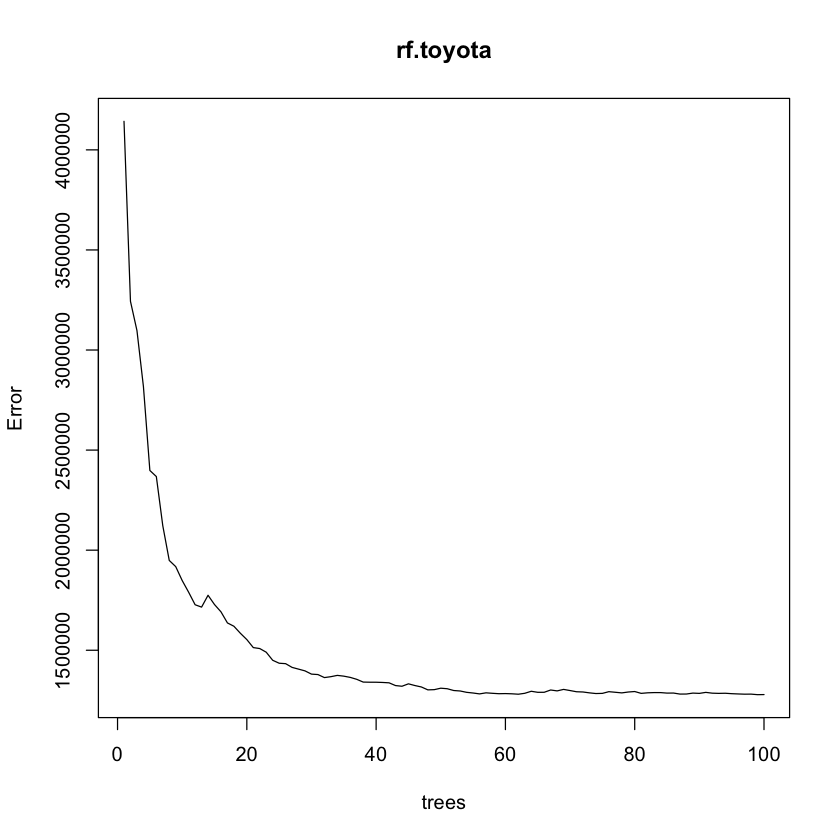

In [54]:
# 변수별 중요도
importance(rf.toyota, type=1) # 감소하는 추세를 본다. 
plot(rf.toyota) 

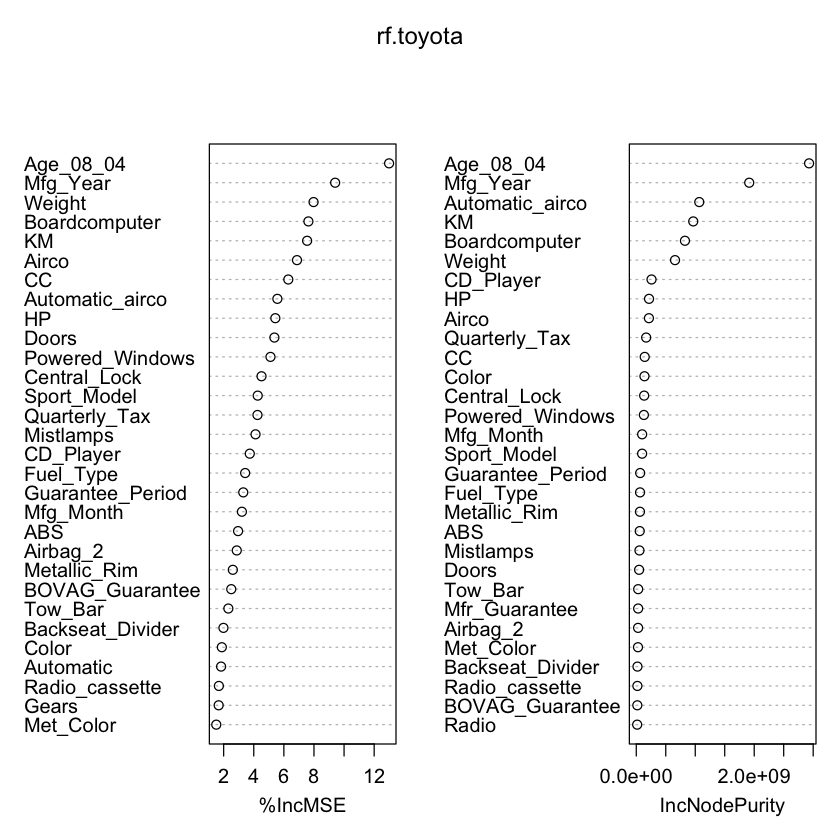

In [55]:
# 중요도 플롯 그려보기
varImpPlot(rf.toyota) # purity가 된 모형은 일반화가 높음으로, 2번째 그래프를 따른다.

## 5. 분석모형 및 평가 
- 선택된 변수를 가지고 분류분석 기법 적용
- Linear regression, Lasso, Decision Trees, boosting 사용 

In [56]:
training = c("Price", "Mfg_Year", "KM", "Weight", "Boardcomputer",
                   "Automatic_airco", "CD_Player")
training = train[,training]
head(training)

,Price,Mfg_Year,KM,Weight,Boardcomputer,Automatic_airco,CD_Player
732,10500,1999,25000,1075,0,0,0
1308,7950,1999,43000,1114,0,0,0
1022,18600,2002,75889,1245,1,0,1
1015,8500,1998,17016,1015,0,0,0
222,11950,2001,37000,1075,0,0,0
359,10000,2000,52000,1025,1,0,0


### - 1. Linear regression

In [57]:
data_lm_full <- lm(Price ~ ., data=training)
summary(data_lm_full)


Call:
lm(formula = Price ~ ., data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-7885.2  -652.1    -5.2   671.9  5829.5 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -2.877e+06  1.007e+05 -28.555  < 2e-16 ***
Mfg_Year          1.436e+03  5.064e+01  28.369  < 2e-16 ***
KM               -1.986e-02  1.370e-03 -14.494  < 2e-16 ***
Weight            1.524e+01  1.156e+00  13.184  < 2e-16 ***
Boardcomputer1   -4.115e+02  1.337e+02  -3.077  0.00215 ** 
Automatic_airco1  2.928e+03  2.193e+02  13.355  < 2e-16 ***
CD_Player1        3.128e+02  1.195e+02   2.618  0.00900 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1216 on 852 degrees of freedom
Multiple R-squared:  0.8827,	Adjusted R-squared:  0.8819 
F-statistic:  1069 on 6 and 852 DF,  p-value: < 2.2e-16


### 이차상호작용 모형 이용

In [58]:
data_lm_full_2 <- lm(Price ~ .^2, data=training)
summary(data_lm_full_2)
#Adjusted R-squared값 증가. 하지만 변수가 29개 늘어남.


Call:
lm(formula = Price ~ .^2, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-7536.2  -678.9    -2.1   657.1  5151.3 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      3.457e+06  1.850e+06   1.868   0.0621 .  
Mfg_Year                        -1.729e+03  9.250e+02  -1.869   0.0620 .  
KM                               1.519e+01  2.384e+00   6.369 3.14e-10 ***
Weight                          -6.753e+03  1.711e+03  -3.946 8.60e-05 ***
Boardcomputer1                   5.138e+05  2.783e+05   1.846   0.0652 .  
Automatic_airco1                 7.054e+05  6.670e+05   1.058   0.2906    
CD_Player1                       1.510e+05  2.712e+05   0.557   0.5779    
Mfg_Year:KM                     -7.605e-03  1.196e-03  -6.361 3.30e-10 ***
Mfg_Year:Weight                  3.383e+00  8.554e-01   3.954 8.32e-05 ***
Mfg_Year:Boardcomputer1         -2.591e+02  1.398e+02  -1.853   0.0642 .  
Mfg_Year:Automat

In [59]:
length(coef(data_lm_full_2)) #coef()는 절편과 기울기를 보여주는 함수이다.

[1] 22

### stepAIC() 사용
- 이중상호작용 모형은 변수를 92개를 쓰면서 지나치게 복잡하다. 이중에서 중요한 변수만을 추출하기 위해 stepAIc()를 쓸 수 있다.

In [60]:
library(MASS)
data_step <- stepAIC(data_lm_full,
                    scope = list(upper = ~.^2, lower=~1)) #가장 복잡한 것부터, 가장 간단한 것 까지.


Start:  AIC=12209.96
Price ~ Mfg_Year + KM + Weight + Boardcomputer + Automatic_airco + 
    CD_Player

                                Df  Sum of Sq        RSS   AIC
+ Mfg_Year:KM                    1   57458545 1201592099 12172
+ Mfg_Year:Weight                1   53923751 1205126893 12174
+ KM:Weight                      1   30396908 1228653736 12191
+ Weight:Boardcomputer           1   21634362 1237416282 12197
+ Weight:CD_Player               1   20420258 1238630386 12198
+ KM:Boardcomputer               1   19786597 1239264047 12198
+ Weight:Automatic_airco         1   13212651 1245837993 12203
+ Mfg_Year:Boardcomputer         1    9206271 1249844373 12206
+ Boardcomputer:CD_Player        1    4263285 1254787359 12209
+ Mfg_Year:CD_Player             1    4254611 1254796033 12209
<none>                                        1259050644 12210
+ Boardcomputer:Automatic_airco  1    1992381 1257058263 12211
+ Automatic_airco:CD_Player      1    1115741 1257934903 12211
+ Mfg_Year:Aut


Step:  AIC=12121.68
Price ~ Mfg_Year + KM + Weight + Boardcomputer + Automatic_airco + 
    CD_Player + Mfg_Year:KM + Mfg_Year:Weight + KM:Automatic_airco + 
    KM:CD_Player + Automatic_airco:CD_Player + Boardcomputer:Automatic_airco

                                Df Sum of Sq        RSS   AIC
+ Mfg_Year:Automatic_airco       1   5127915 1115197318 12120
+ Mfg_Year:Boardcomputer         1   2962470 1117362763 12121
<none>                                       1120325233 12122
- Boardcomputer:Automatic_airco  1   3406309 1123731542 12122
- Automatic_airco:CD_Player      1   3692751 1124017984 12122
+ Boardcomputer:CD_Player        1   1365584 1118959649 12123
+ Weight:Boardcomputer           1    936903 1119388330 12123
+ Weight:Automatic_airco         1    717774 1119607459 12123
+ Mfg_Year:CD_Player             1    562619 1119762614 12123
+ KM:Boardcomputer               1     70832 1120254401 12124
+ KM:Weight                      1     39290 1120285943 12124
+ Weight:CD_Player 

In [61]:
data_step


Call:
lm(formula = Price ~ Mfg_Year + KM + Weight + Boardcomputer + 
    Automatic_airco + CD_Player + Mfg_Year:KM + Mfg_Year:Weight + 
    KM:Automatic_airco + KM:CD_Player + Automatic_airco:CD_Player + 
    Boardcomputer:Automatic_airco + Mfg_Year:Automatic_airco + 
    Mfg_Year:Boardcomputer, data = training)

Coefficients:
                    (Intercept)                         Mfg_Year  
                      4.578e+06                       -2.290e+03  
                             KM                           Weight  
                      1.520e+01                       -7.742e+03  
                 Boardcomputer1                 Automatic_airco1  
                      3.527e+05                        1.163e+06  
                     CD_Player1                      Mfg_Year:KM  
                     -3.813e+02                       -7.612e-03  
                Mfg_Year:Weight              KM:Automatic_airco1  
                      3.878e+00                        2.510e-02  


In [62]:
anova(data_step)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Mfg_Year,1,8467404188,8467404188,6429.229593,0.000000e+00
KM,1,213225393,213225393,161.900268,4.688050e-34
Weight,1,495649278,495649278,376.342376,1.300721e-69
Boardcomputer,1,16000863,16000863,12.149322,5.163780e-04
Automatic_airco,1,273398681,273398681,207.589345,3.064247e-42
CD_Player,1,10130369,10130369,7.691905,5.669261e-03
Mfg_Year:KM,1,57458545,57458545,43.627795,7.023113e-11
Mfg_Year:Weight,1,48994118,48994118,37.200826,1.621261e-09
KM:Automatic_airco,1,15409659,15409659,11.700426,6.548567e-04
KM:CD_Player,1,8838386,8838386,6.710913,9.747783e-03


In [63]:
summary(data_step) #step하기 전보다 Adjusted Rsquared값이 0.01 향상


Call:
lm(formula = Price ~ Mfg_Year + KM + Weight + Boardcomputer + 
    Automatic_airco + CD_Player + Mfg_Year:KM + Mfg_Year:Weight + 
    KM:Automatic_airco + KM:CD_Player + Automatic_airco:CD_Player + 
    Boardcomputer:Automatic_airco + Mfg_Year:Automatic_airco + 
    Mfg_Year:Boardcomputer, data = training)

Residuals:
    Min      1Q  Median      3Q     Max 
-7705.9  -667.2   -14.4   666.0  4993.8 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      4.578e+06  1.212e+06   3.777 0.000170 ***
Mfg_Year                        -2.290e+03  6.061e+02  -3.779 0.000169 ***
KM                               1.520e+01  1.932e+00   7.866 1.12e-14 ***
Weight                          -7.742e+03  1.133e+03  -6.831 1.61e-11 ***
Boardcomputer1                   3.527e+05  2.125e+05   1.660 0.097256 .  
Automatic_airco1                 1.163e+06  5.545e+05   2.098 0.036202 *  
CD_Player1                      -3.813e+02  2.621e+

In [64]:
length(coef(data_step)) 
# 27개에서 15개로 변수가 줄었다.

[1] 15

### 모형평가

##### 모형평가
- 이차상호작용을 고려하고, AIC값을 평가한 이차상호작용 다중회귀가 rmse가 가장 낮다. 

In [65]:
y_obs <- validation$Price
yhat_lm <- predict(data_lm_full, newdata=validation)     # 다중선형회귀 (1차 - 베타1 * X1)
yhat_lm_2 <- predict(data_lm_full_2, newdata=validation) # 이차상호작용을 고려한 다항회귀 (2차 - 베타12 * X1 * X2)
yhat_step <- predict(data_step, newdata=validation) 

In [66]:
rmse <- function(yi,yhat_i){
    sqrt(mean((yi - yhat_i)^2))
}

In [67]:
rmse(y_obs, yhat_lm)

[1] 1264.643

In [68]:
rmse(y_obs, yhat_lm_2)

[1] 1253.84

In [69]:
rmse(y_obs, yhat_step)

[1] 1273.02

### - 2. Lasso

In [70]:
training_lasso = c("Price", "Mfg_Year", "KM", "Weight", "Boardcomputer","Automatic_airco", "CD_Player")
data_lasso = data[,training_lasso]
str(data_lasso)

'data.frame':	1432 obs. of  7 variables:
 $ Price          : int  13500 13750 13750 20950 19600 21500 22000 22750 17950 16950 ...
 $ Mfg_Year       : int  2002 2002 2002 2002 2002 2002 2002 2002 2002 2002 ...
 $ KM             : int  46986 72937 38500 31461 32189 23000 18739 34000 21716 64359 ...
 $ Weight         : int  1165 1165 1170 1185 1185 1185 1185 1185 1105 1105 ...
 $ Boardcomputer  : Factor w/ 2 levels "0","1": 2 2 2 1 2 2 2 2 1 2 ...
 $ Automatic_airco: Factor w/ 2 levels "0","1": 1 1 1 2 2 2 2 2 1 1 ...
 $ CD_Player      : Factor w/ 2 levels "0","1": 1 2 1 2 1 2 1 2 1 2 ...


In [71]:
# 모형행렬 생성
xx <- model.matrix(Price ~.^2-1, data_lasso) 
# model.matrix함수에서, formula로 medv ~.-1 대신에 medv ~.^2-1을 사용한 것은 모든 이차상호작용을 포함하기 위해서다.
# 앞의 lm() 결과에서 보듯이 상호작용 후에 변수 선택/모형 선택을 하는 것이 더 높은 예측력을 줄 것이기 때문이다. 

x <- xx[training_idx,]
y <- training$Price
glimpse(x)


 num [1:859, 1:22] 1999 1999 2002 1998 2001 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:859] "732" "1308" "1022" "1015" ...
  ..$ : chr [1:22] "Mfg_Year" "KM" "Weight" "Boardcomputer0" ...


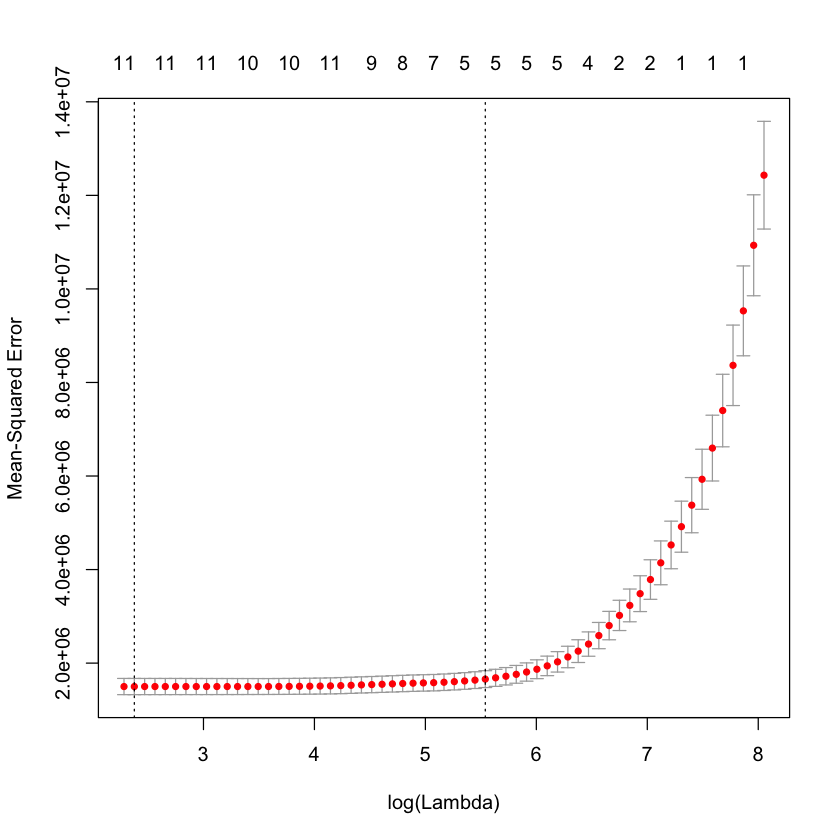

In [72]:
data_cvfit <- cv.glmnet(x,y)
plot(data_cvfit)

In [73]:
coef(data_cvfit, s = c("lambda.1se"))
coef(data_cvfit, s = c("lambda.min")) # 값이 나온 변수들만 취하면 된다. 

23 x 1 sparse Matrix of class "dgCMatrix"
                                            1
(Intercept)                     -2.762855e+06
Mfg_Year                         1.381784e+03
KM                              -1.391367e-02
Weight                           .           
Boardcomputer0                   .           
Boardcomputer1                   .           
Automatic_airco1                 .           
CD_Player1                       .           
Mfg_Year:KM                     -2.801072e-08
Mfg_Year:Weight                  5.288948e-03
Mfg_Year:Boardcomputer1          .           
Mfg_Year:Automatic_airco1        .           
Mfg_Year:CD_Player1              .           
KM:Weight                        .           
KM:Boardcomputer1                .           
KM:Automatic_airco1              .           
KM:CD_Player1                    .           
Weight:Boardcomputer1            .           
Weight:Automatic_airco1          2.253699e+00
Weight:CD_Player1                .    

23 x 1 sparse Matrix of class "dgCMatrix"
                                            1
(Intercept)                     -2.851879e+06
Mfg_Year                         1.423558e+03
KM                               .           
Weight                           .           
Boardcomputer0                   .           
Boardcomputer1                   .           
Automatic_airco1                 .           
CD_Player1                       .           
Mfg_Year:KM                      .           
Mfg_Year:Weight                  7.991444e-03
Mfg_Year:Boardcomputer1          .           
Mfg_Year:Automatic_airco1        .           
Mfg_Year:CD_Player1              .           
KM:Weight                       -1.660176e-05
KM:Boardcomputer1               -9.426734e-03
KM:Automatic_airco1              1.269896e-02
KM:CD_Player1                    2.515916e-03
Weight:Boardcomputer1            1.109542e-01
Weight:Automatic_airco1          1.883003e+00
Weight:CD_Player1                .    

In [74]:
predict.cv.glmnet(data_cvfit, s="lambda.min", newx = x[1:5,]) # x는 트레이드 셋

,1
732,10540.881
1308,10814.817
1022,16247.341
1015,8310.157
222,13191.017


### 모형평가
- RMSE 값이 1250
- 이차상호작용을 고려하고, AIC값을 평가한 이차상호작용 다중회귀(RMSE = 1270) 보다 성능이 좋음

In [75]:
y_obs <- validation$Price
yhat_glmnet <- predict(data_cvfit, s="lambda.min", newx=xx[validate_idx,])
yhat_glmnet <- yhat_glmnet[,1] # change to a vector from [n*1] matrix
rmse(y_obs, yhat_glmnet)

[1] 1250.818

### -3. 회귀나무 모형

In [76]:
data_tr <- rpart(Price ~., data= training)
data_tr

n= 859 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 859 10734860000 10641.540  
   2) Mfg_Year< 2001.5 754  2828616000  9570.390  
     4) Mfg_Year< 1999.5 498   813361800  8633.705  
       8) Mfg_Year< 1998.5 248   268884000  7934.677 *
       9) Mfg_Year>=1998.5 250   303082200  9327.140 *
     5) Mfg_Year>=1999.5 256   728345100 11392.540  
      10) KM>=130212.5 12    29680620  7862.500 *
      11) KM< 130212.5 244   541776600 11566.140  
        22) Mfg_Year< 2000.5 135   263665400 10892.030 *
        23) Mfg_Year>=2000.5 109   140781800 12401.060 *
   3) Mfg_Year>=2001.5 105   828744900 18333.460  
     6) Weight< 1125 54   153442000 16807.830 *
     7) Weight>=1125 51   416536500 19948.820  
      14) KM>=35071.5 20   145145000 17900.000 *
      15) KM< 35071.5 31   133274400 21270.650 *

In [77]:
printcp(data_tr)
summary(data_tr)


Regression tree:
rpart(formula = Price ~ ., data = training)

Variables actually used in tree construction:
[1] KM       Mfg_Year Weight  

Root node error: 1.0735e+10/859 = 12496926

n= 859 

        CP nsplit rel error  xerror     xstd
1 0.659301      0   1.00000 1.00166 0.073464
2 0.119881      1   0.34070 0.34313 0.018053
3 0.024105      2   0.22082 0.22359 0.015496
4 0.022487      3   0.19671 0.22104 0.015502
5 0.014615      4   0.17423 0.18419 0.014232
6 0.012866      5   0.15961 0.18547 0.014790
7 0.012793      6   0.14674 0.18214 0.014545
8 0.010000      7   0.13395 0.17486 0.014267
Call:
rpart(formula = Price ~ ., data = training)
  n= 859 

          CP nsplit rel error    xerror       xstd
1 0.65930050      0 1.0000000 1.0016607 0.07346414
2 0.11988134      1 0.3406995 0.3431305 0.01805278
3 0.02410524      2 0.2208182 0.2235888 0.01549581
4 0.02248708      3 0.1967129 0.2210361 0.01550209
5 0.01461481      4 0.1742258 0.1841945 0.01423157
6 0.01286623      5 0.1596110 0.18

#### 해석
- 가장 중요한 첫 번째 분할은 Mfg_Year<2002 변수값에 의해서다. 첫 번째 분할에서 왼쪽 가지(Age_08_04>=56.5)는 오래된 자동차, 오른쪽 가지(HP<103.5)는 비교적 고소득 지역이라고 볼 수 있다.
- 왼쪽가지 / 오래된 차는 Mfg_Year<2002 (연식), KM(주행거리) 변수로 더 분할이 된다. 

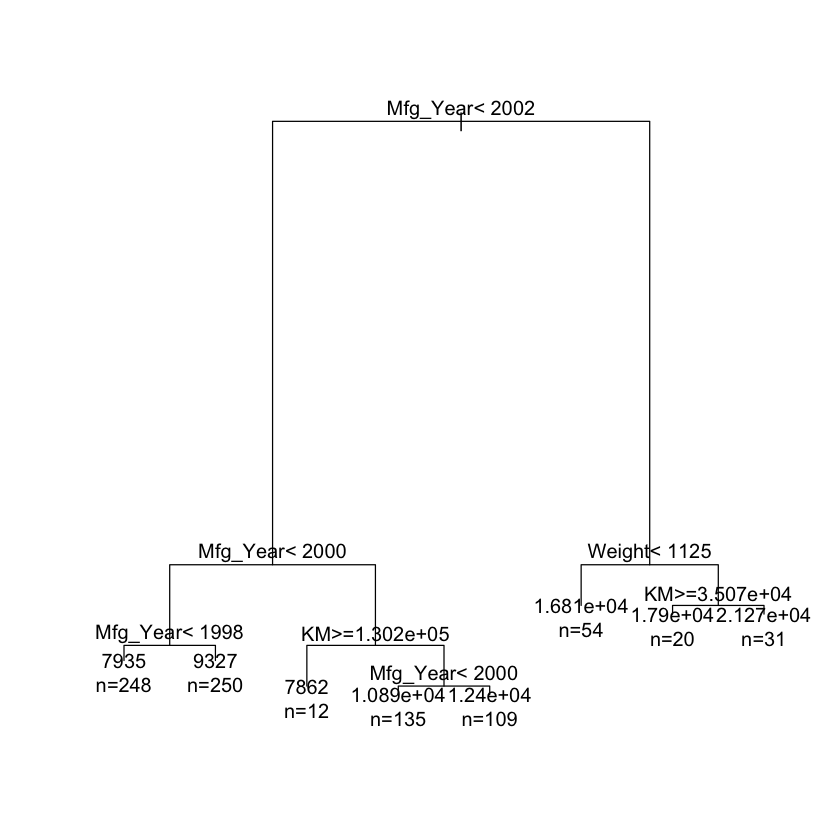

In [78]:
opar <- par(mfrow = c(1,1), xpd = NA)
plot(data_tr)
text(data_tr, use.n = TRUE)
par(opar)

### 모델평가
- 나무모형의 RMSE값이 라쏘의 RMSE값보다 크므로, 나무 모형의 예측력은 라쏘보다 좋지 않다. 

In [79]:
yhat_tr <- predict(data_tr, validation)
rmse(y_obs, yhat_tr) 

[1] 1326.377

### -4. Random Forest

In [80]:
set.seed(1607)
data_rf <- randomForest(Price~ ., training)
data_rf


Call:
 randomForest(formula = Price ~ ., data = training) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 2

          Mean of squared residuals: 1421558
                    % Var explained: 88.62

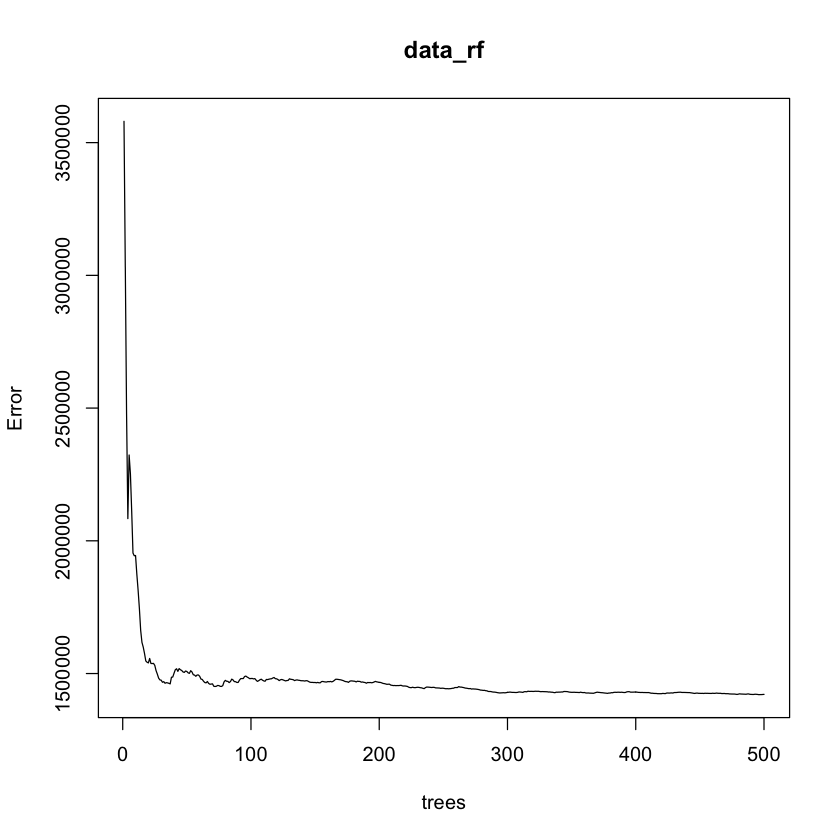

In [81]:
plot(data_rf)

### 모델평가
- Random Forest의 성능은 Lasso 성능보다 좋다


In [82]:
yhat_rf <- predict(data_rf, newdata=validation)
rmse(y_obs, yhat_rf) 

[1] 1125.817

### -5. 부스팅

In [83]:
set.seed(1607)
data_gbm <- gbm(Price ~ ., data=training, distribution="gaussian", shrinkage = 0.01, interaction.depth = 2,
               n.trees=40000, cv.folds=5, verbose =TRUE) #10fold 교차평가

# 비선형 - 

Iter   TrainDeviance   ValidDeviance   StepSize   Improve
     1 12312767.2502             nan     0.0100 182562.1213
     2 12121532.9458             nan     0.0100 190909.3540
     3 11938753.7347             nan     0.0100 203878.2114
     4 11758854.7291             nan     0.0100 194527.2780
     5 11572766.8092             nan     0.0100 182147.9408
     6 11400875.1670             nan     0.0100 171336.9458
     7 11239059.6818             nan     0.0100 187021.3740
     8 11065707.8323             nan     0.0100 144953.6240
     9 10899089.2690             nan     0.0100 165623.0965
    10 10726198.6724             nan     0.0100 161769.0089
    20  9281816.2727             nan     0.0100 132258.7867
    40  7102607.8191             nan     0.0100 96333.4543
    60  5585073.7058             nan     0.0100 67944.5853
    80  4528265.6880             nan     0.0100 42359.4587
   100  3788240.6446             nan     0.0100 25061.7286
   120  3251191.2424             nan     0.010

,var,rel.inf
Mfg_Year,Mfg_Year,53.3828060
KM,KM,25.4926340
Weight,Weight,14.5072873
Automatic_airco,Automatic_airco,5.1034691
CD_Player,CD_Player,0.8516948
Boardcomputer,Boardcomputer,0.6621088


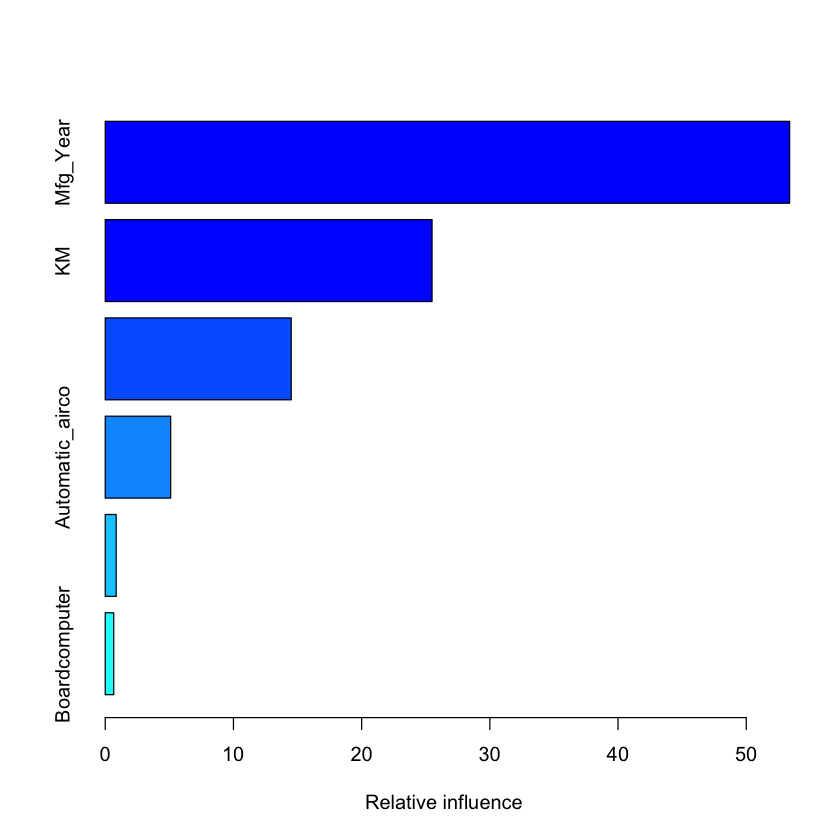

In [84]:
summary(data_gbm)

[1] 1597

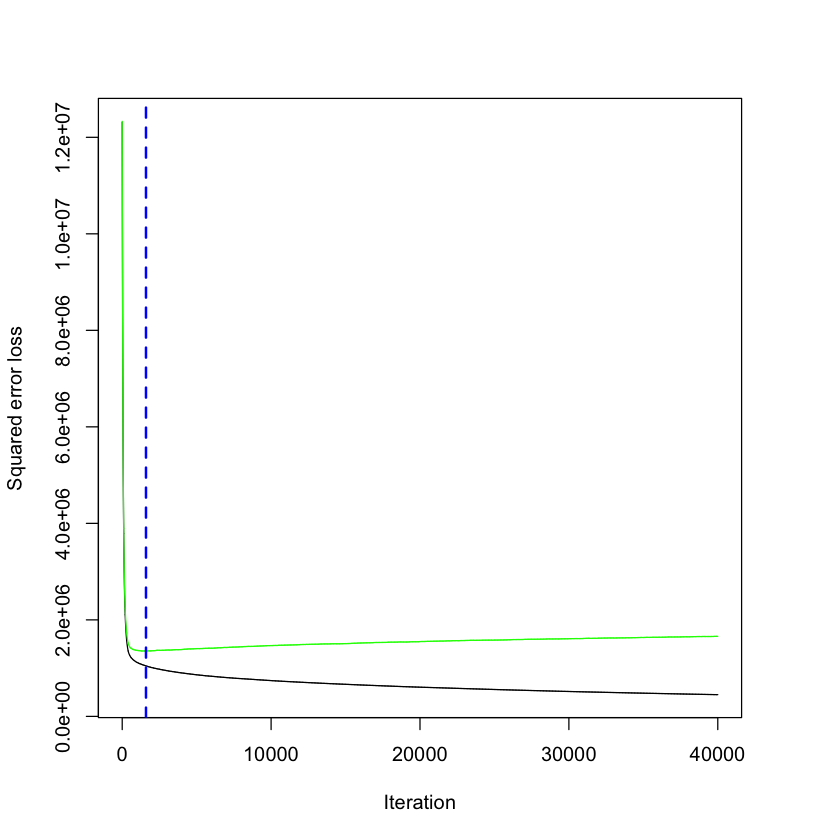

In [85]:
(best_iter = gbm.perf(data_gbm, method="cv"))

### 모델평가
- 부스팅 모형의 RMSE가 Random Forest모형 RMSE 낮다. 즉, 부스팅 모형의 성능이 Lasso 모형의 성능보다 좋지 않다. 

In [86]:
yhat_gbm <- predict(data_gbm, n.trees=best_iter, newdata=validation)
rmse(y_obs, yhat_gbm)

[1] 1051.987

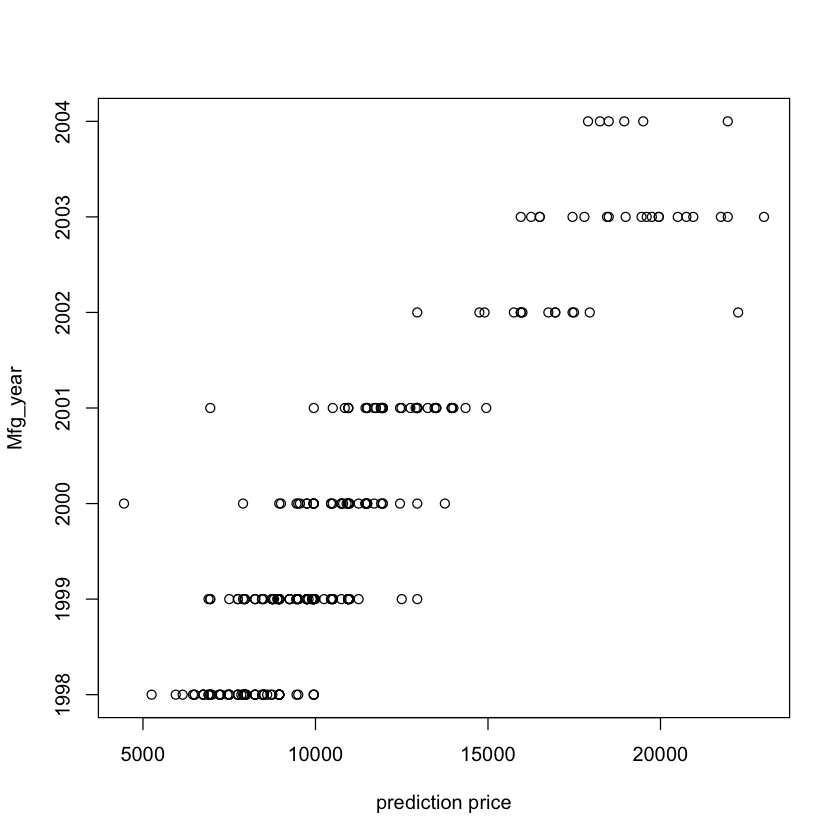

In [107]:
plot(y_obs, validation$Mfg_Year, xlab = "Prediction price", ylab="Mfg_year")
abline(0,1, col ="red")

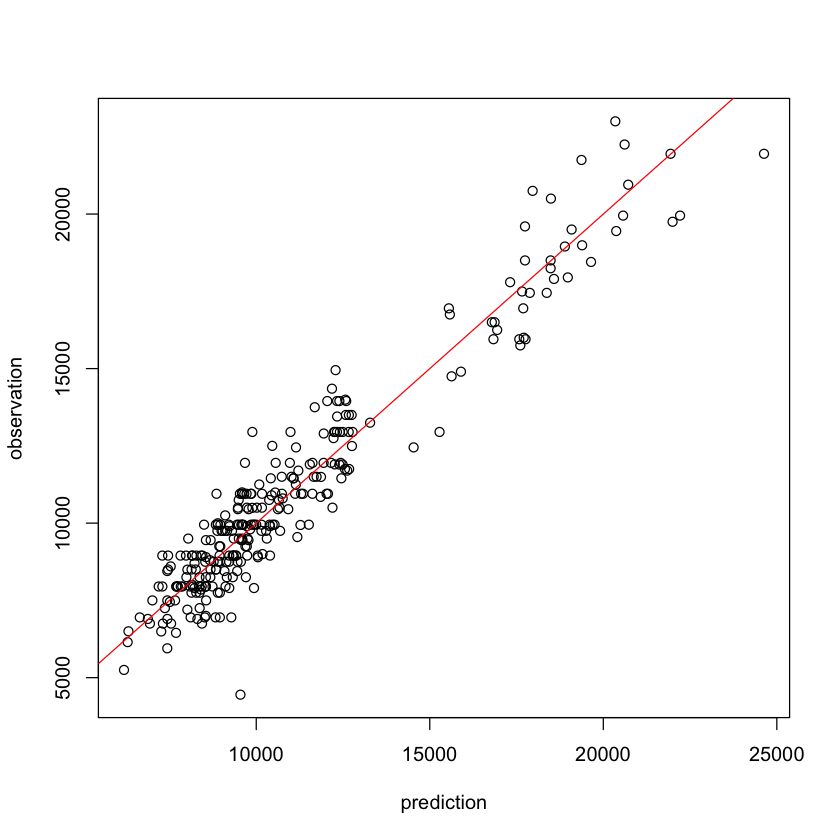

In [105]:
plot(yhat_gbm, y_obs, xlab = "prediction", ylab="observation")
abline(0,1, col ="red")

## 9. 최종 모형 선택과 테스트세트 오차 계산



- Boosting > Random Forest > Lasso > Linear Regression(step) 순으로 예측력이 높다.

In [87]:
data.frame(lm = rmse(y_obs, yhat_step),
          glmnet = rmse(y_obs, yhat_glmnet),
          rf = rmse(y_obs, yhat_rf),
          gbm = rmse(y_obs, yhat_gbm)) %>%
reshape2::melt(value.name = 'rmse', variable.name = 'method')

Using  as id variables


variable,value
lm,1273.020
glmnet,1250.818
rf,1125.817
gbm,1051.987


### Boosting 모형 test dataset 적용

In [88]:
rmse(test$Price, predict(data_gbm, newdata = test))

Using 1597 trees...


[1] 1038.691

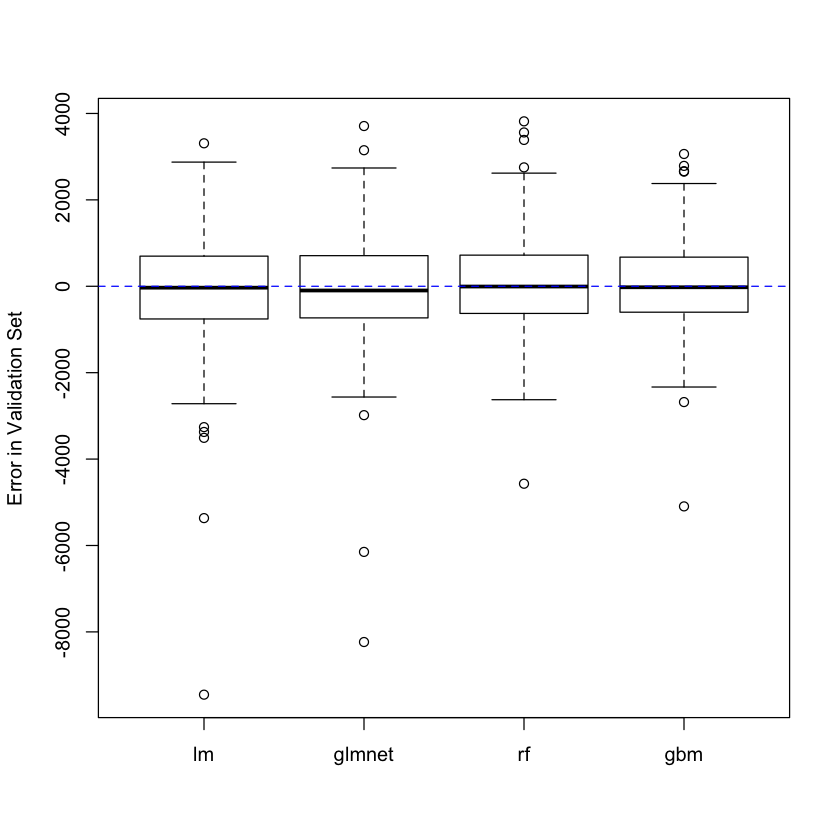

In [89]:
boxplot(list(lm = y_obs-yhat_step,
            glmnet = y_obs-yhat_glmnet,
            rf=y_obs-yhat_rf,
            gbm = y_obs-yhat_gbm), ylab="Error in Validation Set")
abline(h=0, lty=2, col="blue")

In [90]:
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...){
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if(missing(cex.cor)) cex.cor <- 0.8/strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}

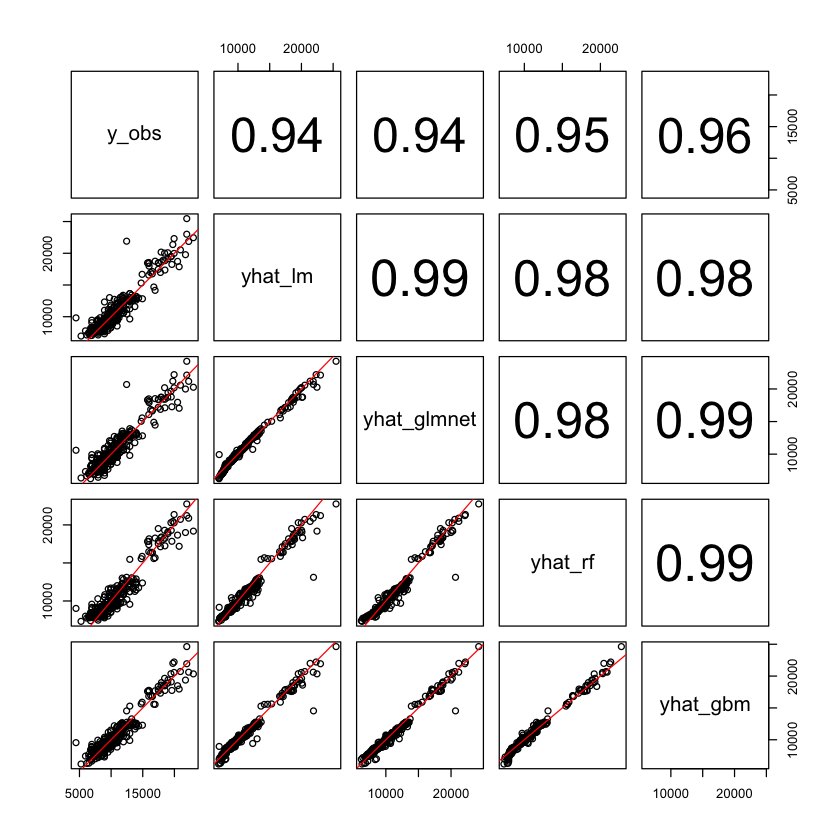

In [91]:
pairs(data.frame(y_obs=y_obs,
                 yhat_lm=yhat_step,
                 yhat_glmnet=c(yhat_glmnet),
                 yhat_rf=yhat_rf,
                 yhat_gbm=yhat_gbm),
      lower.panel=function(x,y){ points(x,y); abline(0, 1, col='red')},
      upper.panel = panel.cor)

# 관측값과 상관계수가 가장 높은 방법은 Random Forest(0.95)와 Boosting(0.95) 이다.